In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io,transform
%matplotlib inline

In [2]:
def data_aug(img):
    mu = 0
    sigma = 0.1
    feature_vec=np.matrix(evecs_mat)

    # 3 x 1 scaled eigenvalue matrix
    se = np.zeros((3,1))
    se[0][0] = np.random.normal(mu, sigma)*evals[0]
    se[1][0] = np.random.normal(mu, sigma)*evals[1]
    se[2][0] = np.random.normal(mu, sigma)*evals[2]
    se = np.matrix(se)
    val = feature_vec*se

    # Parse through every pixel value.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Parse through every dimension.
            for k in range(img.shape[2]):
                img[i,j,k] = float(img[i,j,k]) + float(val[k])



/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


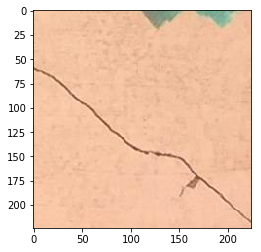

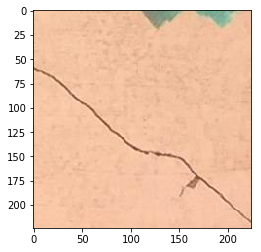

In [3]:
imnames = ['./data/D_1253.png']
#load list of images
imlist = (io.imread_collection(imnames))

res = np.zeros(shape=(1,3))
for i in range(len(imlist)):
    # re-size all images to 256 x 256 x 3
    m=transform.resize(imlist[i],(256,256,3))
    # re-shape to make list of RGB vectors.
    arr=m.reshape((256*256),3)
    # consolidate RGB vectors of all images
    res = np.concatenate((res,arr),axis=0)
res = np.delete(res, (0), axis=0)

# subtracting the mean from each dimension
m = res.mean(axis = 0)
res = res - m

R = np.cov(res, rowvar=False)
# print(R)

evals, evecs = LA.eigh(R)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
# sort eigenvectors according to same index

evals = evals[idx]
# select the first 3 eigenvectors (3 is desired dimension
# of rescaled data array)

evecs = evecs[:, :3]
# make a matrix with the three eigenvectors as its columns.
evecs_mat = np.column_stack((evecs))


# carry out the transformation on the data using eigenvectors
# and return the re-scaled data, eigenvalues, and eigenvectors
m = np.dot(evecs.T, res.T).T

# perturbing color in image[0]
# re-scaling from 0-1
img = imlist[0]/255.0
data_aug(img)
fig=plt.figure()
plt.imshow(img)
tmp = np.array(img*255.0, np.int32)
fig=plt.figure()
plt.imshow(tmp)
print(tmp.shape)
im = Image.fromarray(tmp.astype('uint8'))
im.save('test.png')


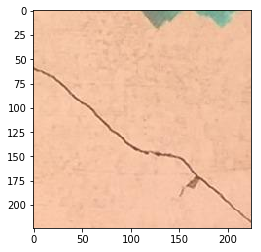

In [4]:
# print(imlist[1])
plt.imshow(imlist[0])